In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
Fimage = cv2.imread("skelet.jpg")
image = cv2.cvtColor(Fimage, cv2.COLOR_BGR2GRAY)

In [3]:
def showImage(a, text):
    #plt.figure(figsize=(10,10))
    #plt.imshow(a, cmap="gray")
    #plt.axis('off')
    #plt.title(text)
    #plt.show()
    plt.figure(figsize=(15,15))
    plt.subplot(121), 
    plt.imshow(image, cmap="gray"), plt.title('Изображение А') 
    plt.axis('off')
    plt.subplot(122), 
    plt.imshow(a, cmap="gray"), plt.title(text) 
    plt.axis('off')
    plt.show()

# Выводим изображение

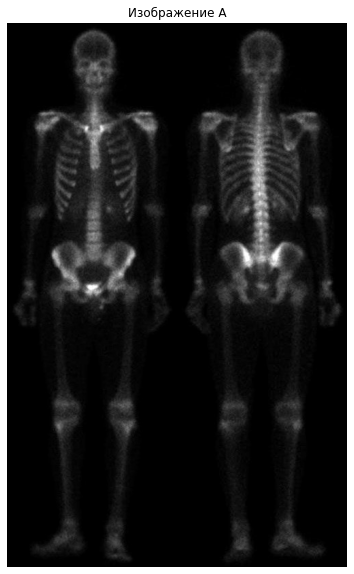

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.title('Изображение А')
plt.show()

# Применяем Лаплассиан к исходному изображению

In [5]:
def norm(img):
    f_m=img-np.min(img)
    return np.round(255*(f_m/np.max(f_m)))

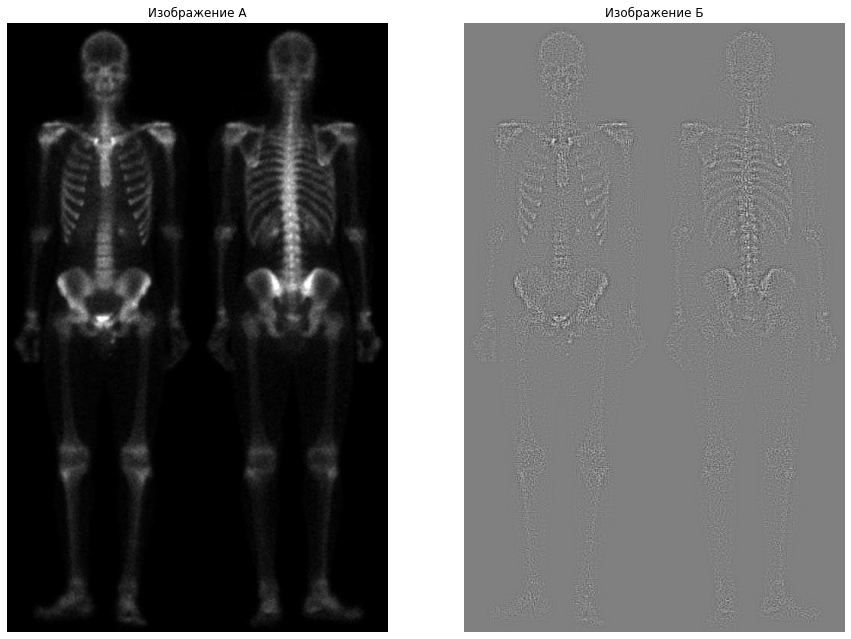

In [6]:
laplacianImage = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
laplacianImage = -np.uint8(norm(laplacianImage))
showImage(laplacianImage, 'Изображение Б')

In [7]:
kernel1 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

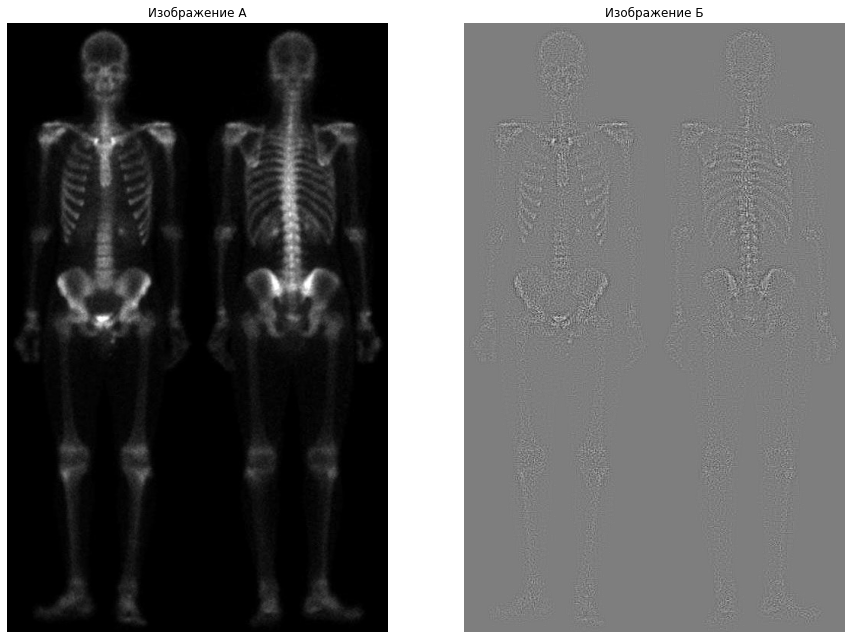

In [8]:
laplasianImage = cv2.filter2D(image, 6, kernel1)
showImage(laplasianImage, 'Изображение Б')

# Повышение резкости сложением двух предыдущих изображений

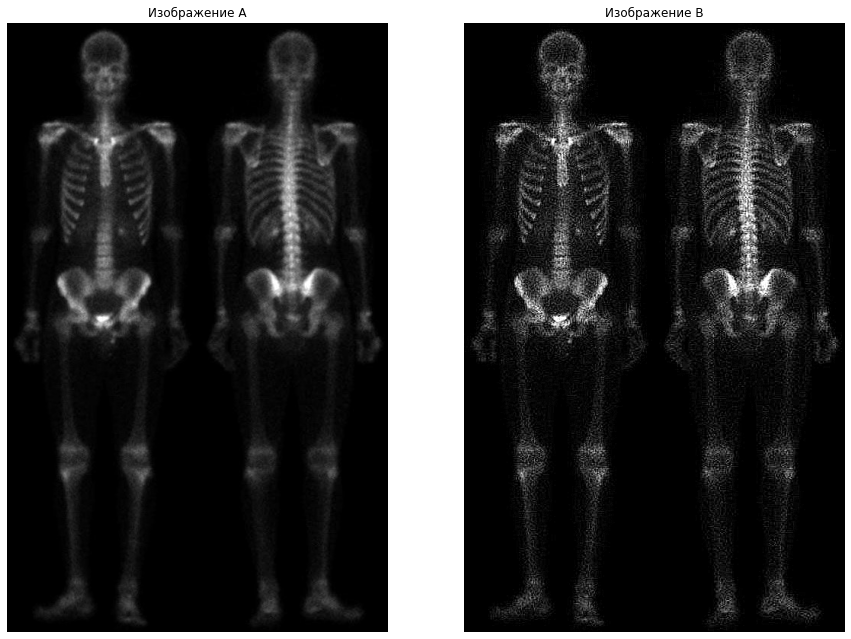

In [9]:
thirdImage = image + laplasianImage
for i in range ( len(thirdImage) ): 
      for j in range ( len(thirdImage[i]) ): 
            if(thirdImage[i][j] < 0): thirdImage[i][j] = 0
            if(thirdImage[i][j] > 255): thirdImage[i][j] = 255
showImage(thirdImage, 'Изображение В')

# Применение оператора Собела – для улучшения выступающих краев


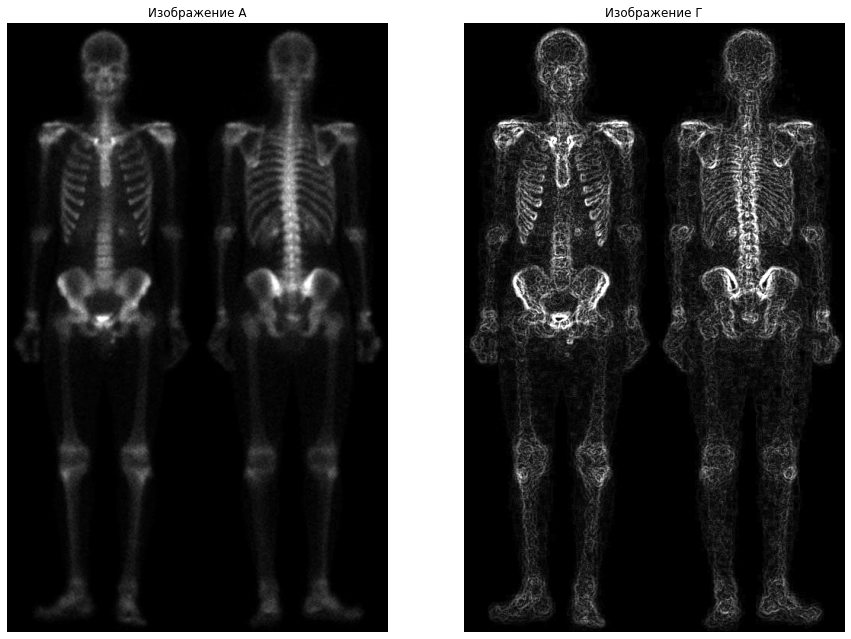

In [10]:
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 1, sobely, 1, 1)
showImage(sobelxy, 'Изображение Г')

# Применение усредняющего сглаживающего фильтра 5x5

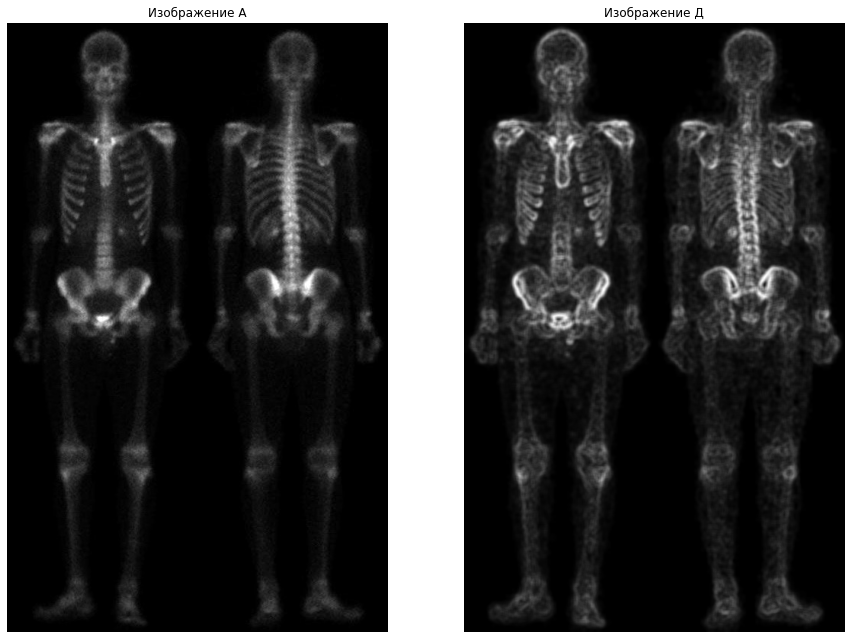

In [11]:
blurImage = cv2.blur(sobelxy, (5, 5))
showImage(blurImage, 'Изображение Д')

# Изображение-маска, полученное перемножением изображений

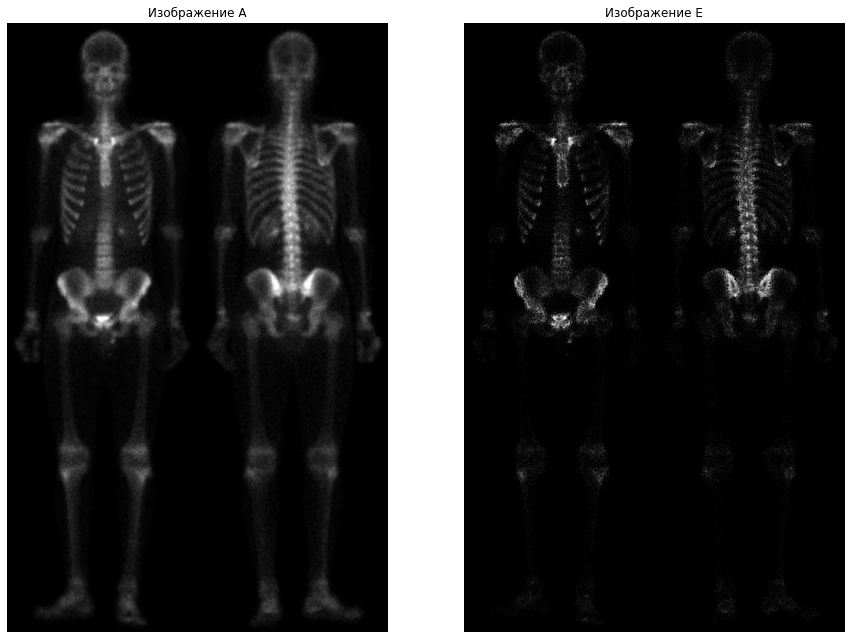

In [12]:
maskImage = blurImage * thirdImage / 255
showImage(maskImage, 'Изображение Е')

# Изображение с повышенной резкостью

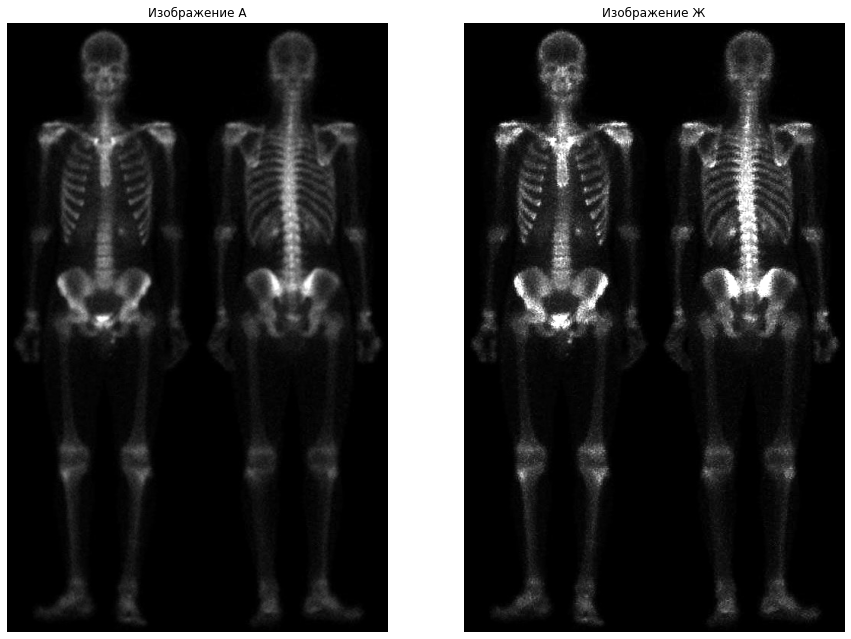

In [13]:
sharpness = np.add(image, maskImage)
for i in range ( len(sharpness) ): 
      for j in range ( len(sharpness[i]) ): 
            if(sharpness[i][j] < 0): sharpness[i][j] = 0
            if(sharpness[i][j] > 255): sharpness[i][j] = 255
showImage(sharpness, 'Изображение Ж')

# Градационная коррекция по степенному закону

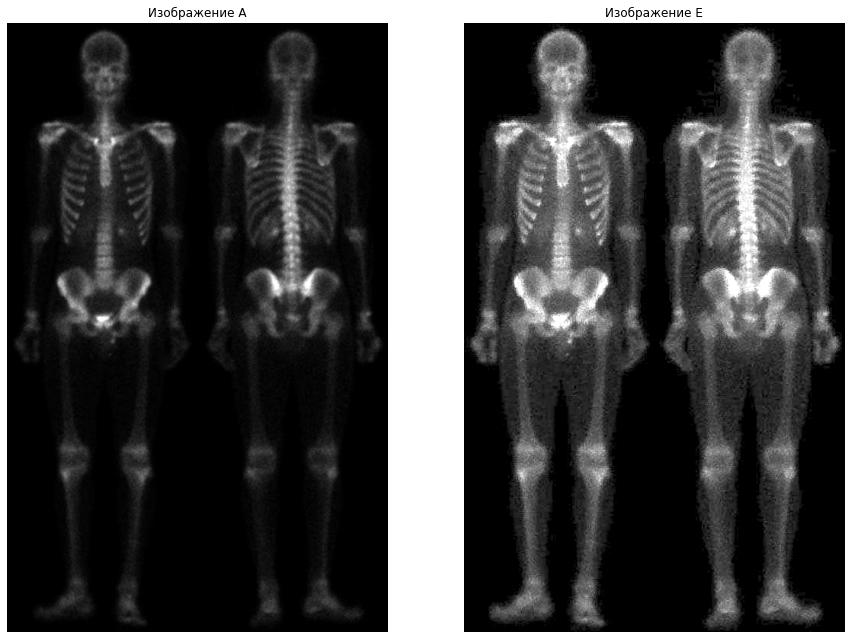

In [16]:
gamma = 0.5
correction = np.uint8(np.array(255*(sharpness / 255) ** gamma))
showImage(correction, 'Изображение Е')